# Grape Disease Detection

<img src="https://www.bilecikolay.com/images/upload/WhatsApp-Image-2024-08-28-at-11.16.08.jpeg">

Bu projemizde  Üzüm yapraklarını CNN ve Transfer Learning(VGG16) kullanarak sınıflandıracağız 

<a href="https://www.kaggle.com/datasets/rm1000/augmented-grape-disease-detection-dataset">Datay Buradan Erişebilirsiniz </a>

In [4]:
import cv2
import pandas as pd
import os

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

In [3]:
os.listdir("Final_Training_Data")

['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']

In [4]:
img_path="Final_Training_Data/"
labels=os.listdir("Final_Training_Data")

In [5]:
#Dosyadan Resim okuma
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):       #Klasörün içindeki alt klasörleri söyler
        img_list.append(img_path+label+"/"+img_file)  #apppend dizinin sonuna eklme yapıyor
        label_list.append(label)

In [6]:
df=pd.DataFrame({"img":img_list,"label":label_list})

In [7]:
df.head()

,img,label
0,Final_Training_Data/Black Rot/00090b0f-c140-4e...,Black Rot
1,Final_Training_Data/Black Rot/003d09ef-e16c-4e...,Black Rot
2,Final_Training_Data/Black Rot/004175d8-dc74-42...,Black Rot
3,Final_Training_Data/Black Rot/004175d8-dc74-42...,Black Rot
4,Final_Training_Data/Black Rot/006efc68-9e46-41...,Black Rot


In [8]:
d={'Black Rot':0,'ESCA':1,'Healthy':2, 'Leaf Blight':3}

In [9]:
df["encode_label"]=df["label"].map(d)

In [10]:
df.sample(5)

,img,label,encode_label
1088,Final_Training_Data/Black Rot/9600ceae-76e4-4e...,Black Rot,0
7234,Final_Training_Data/Healthy/b53106de-9795-4c49...,Healthy,2
1607,Final_Training_Data/Black Rot/d7c18d55-5f15-41...,Black Rot,0
5024,Final_Training_Data/ESCA/_1692_6315448.png,ESCA,1
8871,Final_Training_Data/Healthy/_757_7583038.png,Healthy,2


In [11]:
x=[]
for img in df["img"]:
    img=cv2.imread(img)
    img=cv2.resize(img,(150,150))
    img=img/255
    x.append(img)

In [12]:
x=np.array(x)

In [13]:
y=df["encode_label"]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [16]:
model=Sequential()
model.add(Input(shape=(150,150,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25)) # Burada 'rate' parametresini belirtiyoruz
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128))
model.add(Dense(4, activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [17]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,verbose=1)

Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 78s 244ms/step - accuracy: 0.7869 - loss: 8.6816 - val_accuracy: 0.3225 - val_loss: 239.7095
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 72s 240ms/step - accuracy: 0.9064 - loss: 1.1445 - val_accuracy: 0.4317 - val_loss: 54.6475
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 71s 238ms/step - accuracy: 0.9285 - loss: 0.5147 - val_accuracy: 0.8183 - val_loss: 4.0632
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 69s 231ms/step - accuracy: 0.9451 - loss: 0.2965 - val_accuracy: 0.6533 - val_loss: 5.0686
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 72s 239ms/step - accuracy: 0.9564 - loss: 0.1616 - val_accuracy: 0.6737 - val_loss: 4.2201
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 71s 238ms/step - accuracy: 0.9652 - loss: 0.1230 - val_accuracy: 0.7121 - val_loss: 4.5306
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 71s 235ms/step - accuracy: 0.9698 - loss: 0.1215 - val_accuracy: 0.7192 - val_loss: 2.8547
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 69s 229ms/step - accuracy: 0.9753 - loss

In [22]:
def yb(img):
    img=cv2.imread(img)
    img=cv2.resize(img,(150,150))
    img=img/255
    img=np.expand_dims(img,axis=0)  # Modelin boyutunu arttırıyor
    return img

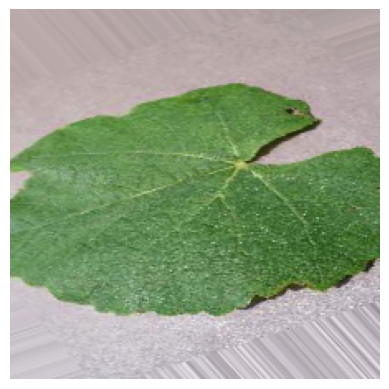

In [23]:
image_path = "Final_Training_Data/Healthy/_757_7583038.png"  # Görüntü dosyasının yolu
img = cv2.imread(image_path)  # Görüntüyü yükleme
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında yükler; RGB'ye dönüştürelim
plt.imshow(img)# Görüntüyü gösterme
plt.axis('off')  # Eksenleri gizleme
plt.show()

In [24]:
image=yb("Final_Training_Data/Healthy/_757_7583038.png")

In [25]:
prediction=model.predict(image)
predicted_class=np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [26]:
predicted_class

2

In [27]:
# {'Black Rot':0,'ESCA':1,'Healthy':2, 'Leaf Blight':3}

In [17]:
model.save("uzum_modeli.h5")

### VGG16 ile

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50,Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Tek satırda resimlerin tamamını okumaya yarıyor

In [2]:
data_dir="Final_Training_Data"
img_width,img_height=224,224

train_datagen=ImageDataGenerator(rescale=1/255, validation_split=0.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="sparse", subset="training")

test_datagen=ImageDataGenerator( rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="sparse", subset="validation")

base_model=VGG16(weights="imagenet", input_shape=(img_width,img_height,3),include_top=False)
model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation="relu")) # Dense nöronları birbirine bağlar
model.add(Dense(4,activation="softmax"))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 9600 images belonging to 4 classes.
Found 2400 images belonging to 4 classes.
Epoch 1/10


C:\Users\erkan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 952s 3s/step - accuracy: 0.8180 - loss: 1.9281 - val_accuracy: 0.9629 - val_loss: 0.1038
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 934s 3s/step - accuracy: 0.9856 - loss: 0.0416 - val_accuracy: 0.9771 - val_loss: 0.0666
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 925s 3s/step - accuracy: 0.9866 - loss: 0.0341 - val_accuracy: 0.9679 - val_loss: 0.0966
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 927s 3s/step - accuracy: 0.9897 - loss: 0.0264 - val_accuracy: 0.9758 - val_loss: 0.0865
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 923s 3s/step - accuracy: 0.9878 - loss: 0.0324 - val_accuracy: 0.9750 - val_loss: 0.0779
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 570s 2s/step - accuracy: 0.9939 - loss: 0.0134 - val_accuracy: 0.9804 - val_loss: 0.0702
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 0.9792 - val_loss: 0.0841
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 513s 2s/step - accuracy: 0.9955 - loss: 0.0156 - val_accuracy: 0.972

In [3]:
model.save("uzum_modeli_2.h5")

Sonuc olarak

İlk modelimizde 96% İkinci modelimizde 99% accuracy elde ettik ama benim gözlemlediğim kadarıyla ilk model daha doğru sonuçlar veriyor.